#                                    Лабораторная работа №7

## Pandas: Обработка данных

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

**1.** Описание исходных данных приведено тут: https://www.kaggle.com/janiobachmann/math-students. Вам предложены измененные данные.

In [13]:
# Открываем таблицу с данными об учениках 
import pandas as pd
data = pd.read_csv('math_students.csv', delimiter=',')

Проанализируйте данные - выведите всю возможную информацию, типы данных, распределение по каждому столбцу. 

In [14]:
# Вывести общую информацию о наборе данных
print(data.info())

# Вывести описательную статистику для числовых столбцов
print("\n1",data.describe())

# Вывести описательную статистику для нечисловых (категориальных) столбцов
print("\n2",data.describe(include=['object']))

# Вывести первые несколько строк набора данных
print("\n3",data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      415 non-null    object
 1   sex         415 non-null    object
 2   age         415 non-null    int64 
 3   address     415 non-null    object
 4   famsize     415 non-null    object
 5   Pstatus     415 non-null    object
 6   Medu        415 non-null    int64 
 7   Fedu        415 non-null    int64 
 8   Mjob        413 non-null    object
 9   Fjob        415 non-null    object
 10  reason      414 non-null    object
 11  guardian    413 non-null    object
 12  traveltime  415 non-null    int64 
 13  studytime   415 non-null    int64 
 14  failures    415 non-null    int64 
 15  schoolsup   415 non-null    object
 16  famsup      414 non-null    object
 17  paid        415 non-null    object
 18  activities  415 non-null    object
 19  nursery     415 non-null    object
 20  higher    

При наличии пустых значений - удалите соответствующие строки. 

In [15]:
data_clean = data.dropna()

print(len(data), len(data_clean))

415 411


При наличии нелогичных данных - удалите соответствующие строки. 

In [16]:
import pandas as pd

# Загрузите данные из файла student-mat.csv или student-por.csv

# Определите критерии для нелогичных данных
# Например, для столбца 'age', нелогичные значения могут быть меньше 15 или больше 22
# Для столбца 'absences', нелогичные значения могут быть больше 93
age_criteria = (data_clean['age'] < 15) | (data_clean['age'] > 22)
absences_criteria = (data_clean['absences'] > 93)

# Объедините критерии для всех столбцов, которые вас интересуют
combined_criteria = age_criteria | absences_criteria

# Удалите строки с нелогичными данными
data_cleaned = data_clean[~combined_criteria]

# Вывести общую информацию о очищенных данных
print(len(data_cleaned))


411


Если в таблице имеются повторяющиеся строки - удалите их.

In [17]:
data_no_duplicates = data.drop_duplicates()
print(len(data_no_duplicates))


402


После предобработки данных визуализируйте распределение значений всех столбцов. 

C:\Users\Konstantin\AppData\Local\Temp\ipykernel_14072\1889067581.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


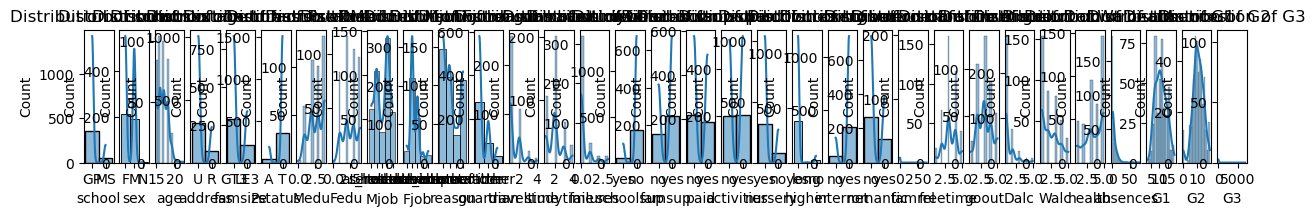

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузите данные из файла student-mat.csv или student-por.csv

# Создайте сетку графиков
num_cols = len(data_no_duplicates.columns)
num_rows = 5  # Можно настроить количество строк в сетке

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Постройте распределение для всех столбцов
for i, column in enumerate(data_no_duplicates.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.histplot(data_no_duplicates[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Удалите пустые подграфики, если количество столбцов не кратно num_cols
for i in range(len(data_no_duplicates.columns), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Постройте распределение для всех столбцов
for column in data_no_duplicates.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_no_duplicates[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


Следующие задания выполните на предобработанных данных.

* Какая причина выбора школы была самой частой? В качестве ответа приведите соответствующее значение признака.

In [20]:
import pandas as pd

# Подсчитайте частоту каждой причины выбора школы
reason_counts = data_no_duplicates['reason'].value_counts()

# Выберите самую частую причину выбора школы
most_common_reason = reason_counts.index[0]

print(f"Самая частая причина выбора школы: {most_common_reason}")


Самая частая причина выбора школы: course


* Найдите количество студентов, у родителей (одного или обоих - рассмотрите оба варианта) которых нет никакого образования.

In [21]:
import pandas as pd


# Фильтруйте данные, чтобы найти студентов, у родителей которых нет образования
students_without_parent_education = data_no_duplicates[(data_no_duplicates['Medu'] == 0) | (data_no_duplicates['Fedu'] == 0)]

# Получите количество таких студентов
count_students_without_parent_education = len(students_without_parent_education)

print(f"Количество студентов, у родителей которых нет никакого образования: {count_students_without_parent_education}")


Количество студентов, у родителей которых нет никакого образования: 5


* Найдите минимальный возраст учащегося школы Mousinho da Silveira.

In [22]:
# Фильтруйте данные для школы "Mousinho da Silveira"
mousinho_da_silveira_data = data_no_duplicates[data_no_duplicates['school'] == 'MS']

# Найдите минимальный возраст в этой школе
min_age = mousinho_da_silveira_data['age'].min()

print(f"Минимальный возраст учащегося в школе Mousinho da Silveira: {min_age}")

Минимальный возраст учащегося в школе Mousinho da Silveira: 17


* Найдите количество студентов, имеющих нечетное число пропусков.

In [23]:
# Фильтруйте данные, чтобы найти студентов с нечетным числом пропусков
students_with_odd_absences = data_no_duplicates[data_no_duplicates['absences'] % 2 == 1]

# Получите количество таких студентов
count_students_with_odd_absences = len(students_with_odd_absences)

print(f"Количество студентов с нечетным числом пропусков: {count_students_with_odd_absences}")

Количество студентов с нечетным числом пропусков: 41


* Найдите разность между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.

In [24]:
import pandas as pd

# Группируйте данные по статусу в романтических отношениях
grouped_data = data_no_duplicates.groupby('romantic')

# Вычислите средние итоговые оценки для каждой группы
mean_grades = grouped_data['G3'].mean()

# Найдите разницу между средними оценками
difference = mean_grades['no'] - mean_grades['yes']

# Округлите разницу до двух значащих цифр после запятой
rounded_difference = round(difference, 2)

print(f"Разница между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях: {rounded_difference}")


Разница между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях: -48.18


* Сколько занятий пропустило большинство студентов с самым частым значением наличия внеклассных активностей?

*Примечание. В данном контексте под "большинством" подразумеваются студенты, имеющее самое частое значение пропусков. То есть в данном задании необходимо:*


* *Определить самое частое значение наличия внеклассных активностей (да или нет).*
* *Для группы студентов, соответствующей этому значению, рассмотреть значения признака «число пропусков».*
* *Для каждого значения числа пропусков посчитать, сколько студентов ему соответствует.*
* *Выбрать значение числа пропусков с наибольшим числом студентов.*



In [26]:
import pandas as pd

# Найдите самое частое значение наличия внеклассных активностей (да или нет)
most_common_activities = data_no_duplicates['activities'].mode().iloc[0]

# Выберите группу студентов с этим значением
students_with_common_activities = data_no_duplicates[data_no_duplicates['activities'] == most_common_activities]

# Найдите значение числа пропусков с наибольшим числом студентов
most_common_absences = students_with_common_activities['absences'].mode().iloc[0]

# Посчитайте, сколько студентов пропустило такое количество занятий
students_with_most_common_absences = students_with_common_activities[students_with_common_activities['absences'] == most_common_absences]
num_students_with_most_common_absences = len(students_with_most_common_absences)

print(f"Самое частое значение наличия внеклассных активностей: {most_common_activities}")
print(f"Занятий, которые пропустило большинство студентов с этим значением: {most_common_absences}")
print(f"Количество студентов с этим количеством пропусков: {num_students_with_most_common_absences}")


Самое частое значение наличия внеклассных активностей: yes
Занятий, которые пропустило большинство студентов с этим значением: 0
Количество студентов с этим количеством пропусков: 51


**2.** Возьмите свой набор данных (или выберите, например, на kaggle). Выполните различные возможные операции по предобработке и первичному анализу данных.